# Fitting basic models
To begin this chapter, we'll focus on fitting two basic models: multinomial choice and linear regression. These models are special because, among other things, they admit very efficient computational solutions. That is, they do not require the sort of brute-force methods we'll use later in the week to fit more complex models. In both cases, the key to saving computer time will be math, and as a means of understanding the model we're fitting, we'll first generate data from it.

## Multinomial choice
Multinomial choice data are simply data drawn from a [multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution). That is, they're count data from a process where the outcome is discrete and selected from a finite set. The simplest multinomial is a binomial, where the events are heads and tails and the counts are the numbers of heads and tails, but the principle generalizes to, e.g., numbers of selections of each answer on a multiple-choice problem.

A multinomial distribution with $K$ categories is characterized by a probability vector $p$ with one entry for each possible outcome $i = 1\ldots K$. Naturally, this probability must be normalized, $\sum_{i=1}^K p_i = 1$. For any _single observation_, the outcome is governed by a [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) (the categorical distribution for binary outcomes is called the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)), where the probability of observing outcome $i$ is $p_i$. When we observe multiple outcomes, the probability of seeing $n_i$ of each type out of a total of $\sum_i n_i = N$ is given by the multinomial distribution:

$$
p(\lbrace n_i\rbrace) = \frac{N!}{n_1!n_2!\cdots n_K!} p_1^{n_1} p_2^{n_2} \cdots p_K^{n_K}
$$

Our goal will be to fit this model to data.

```{admonition} Exercise
1. Using NumPy's [`random.multinomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) function, generate a vector of counts from the multinomial distribution with probabilities `p = [0.1, 0.5, 0.2, 0.2]`.

1. One way of fitting the model above to these data is by selecting the parameter vector $p$ that maximizes the likelihood (the probability of the data given the parameters) given above. In fact, it is usually simpler to maximize the log of the likelihood, since sums are often easier to compute with than products. Show that the solution

   $$
   p = \left(\frac{n_1}{N}, \frac{n_2}{N}, \ldots, \frac{n_K}{N}\right)
   $$

   maximizes the log likelihood and is thus the "best fitting" multinomial model.

1. Calculate the maximum likelihood estimate of $p$ for your data. Does it match the one used to generate them? How does this change with $N$?
```

### Solution:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

np.random.seed(12345)  # set random seed for reproducibility

p = [0.1, 0.5, 0.2, 0.2]
N = 1000

sample = np.random.multinomial(N, pvals=p)

print(f"probabilities = {p}, sample estimates = {sample/N}")

probabilities = [0.1, 0.5, 0.2, 0.2], sample estimates = [0.102 0.492 0.225 0.181]


```{toggle}

**Derivation:**

From the experession above for the probability of the counts, $p(\{n_i\})$, we have the log likelihood

$$
\mathcal{L} = n_1 \log p_1 + n_2 \log p_2 + \ldots + n_K \log p_K + C
$$

where $C$ is a constant that does not depend on any of the $p_i$. Now, we would like to find the maximum
of this expression by differentiating with respect to each of the $p_i$ and setting the result to 0, but 
we must remember that the $p_i$ are not all independent &mdash; they must sum to 1. Thus, we replace $p_K$ 
with $1 - \sum_{i=1}^{K-1} p_i$ and use

$$
\mathcal{L} = \sum_{j=1}^{K-1} n_j \log p_j + n_K \log \left(1 - \sum_{i=1}^{K-1} p_i\right) .
$$

Differentiating this with respect to a particular $p_k$ then gives the maximum likelihood condition

$$
0 = \frac{n_k}{p_k} - \frac{n_K}{1 - \sum_{i=1}^{K-1} p_i} = \frac{n_k}{p_k} - \frac{n_K}{p_K} .
$$

Clearly, this is satisfied only when we have $n_i/p_i$ equal to a constant for all $i$. That is, $p_i = n_i/A$. 
Recalling that the $p_i$ must sum to $1$ while the $n_i$ sum to $N$ then gives $A = N$, which is the maximum likelihood solution stated above. ■
```

Moreover, as $N$ gets large, the maximum likelihood estimate gets closer and closer to the true probabilities. This property is called [consistency](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#Consistency) and is a property shared by most maximum likelihood estimators. (In fact, many of these estimators can be proven to be normally distributed around the correct value for large samples.)


## Linear regression
Linear regression is the best-studied fitting procedure in all of statistics. Here, we'll explore two means of fitting a linear model, both based on maximum likelihood, which we've already seen is equivalent to minimizing the sum of squared errors.

```{admonition} Exercise
1. Generate 500 data points from the model

    $$
    y = \beta_0 + \beta_1 x + \varepsilon
    $$

    with $x$ randomly (uniformly) distributed between 0 and 1, $\beta_0 = -1$, $\beta_1 = 0.85$, and $\varepsilon$ randomly (normally) distributed with mean 0 and standard deviation 0.1. Make a scatterplot of these data.

1. Create a function that calculates the sum of the squared residuals (errors between predicted and observed data) given a vector $\boldsymbol{\beta}$ of input parameters. Use SciPy's [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to find the values of $\beta_0$ and $\beta_1$ that minimize this function.

1. Plot the best-fit line through the data defined by the regression coefficients you found above.
```

### Solution:

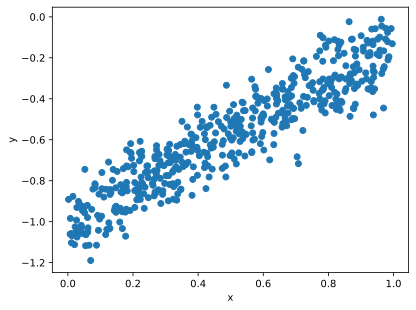

In [8]:
N = 500

beta = [-1, 0.85]

x_samples = np.random.rand(N)  # rand is uniformly distributed in [0, 1]
eps_samples = 0.1 * np.random.randn(N)  # randn is N(0, 1)

y = beta[0] + beta[1] * x_samples + eps_samples

plt.scatter(x_samples, y)
plt.xlabel('x')
plt.ylabel('y');

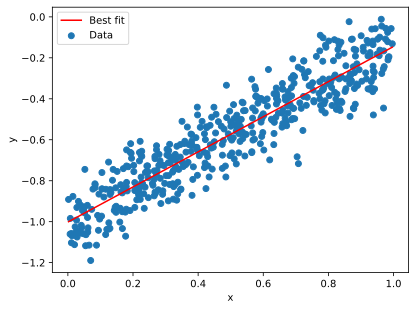

In [12]:
def err(beta, x, y):
    return np.sum((y - (beta[0] + beta[1] * x))**2)

from scipy.optimize import minimize

res = minimize(err, x0=[0,1], args=(x_samples, y))
beta_pred = res['x']

x1 = np.linspace(x_samples.min(),x_samples.max(),1000)
plt.plot(x1, beta_pred[0]+beta_pred[1]*x1, color='red')
plt.scatter(x_samples, y);
plt.legend(["Best fit","Data"])
plt.xlabel("x");
plt.ylabel("y");